In [37]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

#from skbio.stats.composition import clr
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

def color_big_red(val):
    color = 'red' if abs(val) >0.4 else 'black'
    return 'color: %s' % color

## Data 

In [38]:
data = pd.read_excel(r'C:\Users\boai-\Desktop\UnumAI\Colorado analysis\2020_CO_terms_cleaned.xlsx')

In [39]:
data.shape

(7795, 246)

In [40]:
data.head()

,Unnamed: 0,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-06 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00
0,0,% of people,Electability,NaN,0.000016,NaN,NaN,0.000010,NaN,NaN,...,NaN,NaN,0.000011,NaN,NaN,0.000012,NaN,NaN,NaN,NaN
1,1,1 diabetes,Healthcare,0.000014,0.000016,0.000019,NaN,NaN,NaN,0.000011,...,0.000036,0.000032,NaN,0.000010,0.000011,0.000021,0.000015,0.000018,0.000012,0.000010
2,2,1 president,Electability,0.000031,0.000035,0.000075,0.000071,0.000041,0.000077,0.000029,...,0.000046,0.000040,0.000035,0.000041,0.000047,0.000055,0.000030,0.000040,0.000041,0.000028
3,3,10 women,Social Equality,0.000010,NaN,0.000019,0.000012,NaN,0.000011,0.000011,...,NaN,0.000020,0.000011,NaN,0.000011,0.000021,NaN,NaN,0.000012,0.000018
4,4,100 homes,Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data[['Category', 'Term']].groupby('Category').count()

,Term
Category,
Agriculture,52
Campaign Finance,45
Congress,275
Conspiracy,41
Corporate Regulation,51
Criminal Justice,323
Cybersecurity,23
Economy,1221
Education,285


In [42]:
# Setting up variables for each category.
# Not used but may be helpful
conspiracy = data[data['Category'].isin(['Conspiracy', 'Mueller/Russia'])]
corpreg_econ = data[data['Category'].isin(['Corporate Regulation','Economy'])]
crime = data[data['Category'].isin(['Criminal Justice', 'Public Safety', 'Guns'])]
Health= data[data['Category'].isin([ 'Healthcare'])]
education = data[data['Category'].isin(['Education'])]
electability = data[data['Category'].isin(['Electability'])]
environment = data[data['Category'].isin(['Environmental'])]
ethics = data[data['Category'].isin(['Ethics/Morals'])]
immigration = data[data['Category'].isin(['Immigration'])]
impeachment = data[data['Category'].isin(['Impeachment'])]
law_gov = data[data['Category'].isin(['Campaign Finance', 'Judiciary Branch', 'Generic Policy Queries', 'Voter Turnout', 'Election Security', 'Congress', 'Cybersecurity'])]
media = data[data['Category'].isin(['Media'])]
religion = data[data['Category'].isin(['Religion'])]
rephealth = data[data['Category'].isin(['Reproductive Health'])]
soceq = data[data['Category'].isin(['Social Equality'])]
taxes = data[data['Category'].isin(['Taxes/Spending'])]
trade_ag = data[data['Category'].isin(['Trade', 'Agriculture'])]
war = data[data['Category'].isin(['War'])]

In [43]:
data.head()

,Unnamed: 0,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-06 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00
0,0,% of people,Electability,NaN,0.000016,NaN,NaN,0.000010,NaN,NaN,...,NaN,NaN,0.000011,NaN,NaN,0.000012,NaN,NaN,NaN,NaN
1,1,1 diabetes,Healthcare,0.000014,0.000016,0.000019,NaN,NaN,NaN,0.000011,...,0.000036,0.000032,NaN,0.000010,0.000011,0.000021,0.000015,0.000018,0.000012,0.000010
2,2,1 president,Electability,0.000031,0.000035,0.000075,0.000071,0.000041,0.000077,0.000029,...,0.000046,0.000040,0.000035,0.000041,0.000047,0.000055,0.000030,0.000040,0.000041,0.000028
3,3,10 women,Social Equality,0.000010,NaN,0.000019,0.000012,NaN,0.000011,0.000011,...,NaN,0.000020,0.000011,NaN,0.000011,0.000021,NaN,NaN,0.000012,0.000018
4,4,100 homes,Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# PCA
#### Run if PCA has not already been done

In [44]:
df = data.drop(columns={"Term"}).fillna(0).groupby('Category').mean().T
df.drop(columns={'Space','Impeachment','State/Local'},inplace=True)


In [45]:
df.head()

Category,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,Electability,...,Mueller/Russia,National Security,Public Safety,Religion,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout
Unnamed: 0,2542.846154,3045.355556,3564.200000,3334.853659,2752.725490,3459.795666,2995.739130,3411.644554,3199.873684,3651.577889,...,5037.275862,3469.167715,3572.303879,3064.285714,3304.450000,3717.603631,4292.987342,4323.161290,4457.983051,5653.593750
2019-02-15 00:00:00,0.000030,0.000017,0.000157,0.000036,0.000194,0.000306,0.000050,0.000118,0.000104,0.000102,...,0.000094,0.000247,0.000218,0.000048,0.000088,0.000089,0.000300,0.000047,0.000121,0.000091
2019-02-16 00:00:00,0.000032,0.000014,0.000190,0.000035,0.000167,0.000299,0.000042,0.000108,0.000100,0.000099,...,0.000104,0.000249,0.000251,0.000059,0.000106,0.000081,0.000225,0.000049,0.000120,0.000063
2019-02-17 00:00:00,0.000034,0.000020,0.000159,0.000042,0.000141,0.000325,0.000051,0.000113,0.000106,0.000104,...,0.000114,0.000215,0.000235,0.000076,0.000114,0.000093,0.000194,0.000047,0.000127,0.000060
2019-02-18 00:00:00,0.000032,0.000017,0.000128,0.000034,0.000187,0.000320,0.000053,0.000123,0.000114,0.000107,...,0.000103,0.000200,0.000226,0.000057,0.000111,0.000095,0.000199,0.000049,0.000149,0.000061


In [46]:
df['tot'] = df.sum(axis=1)
for i in df.columns:
    df[i] = df[i] / df.tot
df.drop(columns={'tot'},inplace=True)

In [47]:
fa = FactorAnalyzer(n_factors=14, rotation='varimax')
fa.fit(df)

factors = pd.DataFrame(fa.loadings_, index=list(df.columns)).style.applymap(color_big_red)
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Agriculture,-0.0658482,0.360562,0.486821,0.171773,0.257344,-0.067562,-0.276395,-0.0820625,0.00569083,0.083556,0.0124416,-0.091551,-0.294914,0.0240504
Campaign Finance,0.0335443,-0.17048,0.901137,0.0391636,0.12862,-0.0171738,0.0154081,0.0419628,0.0206401,0.12208,-0.00775799,-0.0332422,-0.0735129,0.0493062
Congress,-0.0913553,-0.143621,0.0336583,0.228856,0.00765561,0.799214,-0.0328275,0.0924018,0.0726674,0.0976674,-0.0492411,0.0386242,-0.0320148,-0.0227959
Conspiracy,-0.0392616,0.026019,0.719509,-0.0692547,0.233761,0.0474095,0.0365888,-0.035082,-0.0101306,0.0872402,-0.0522922,-0.0658786,0.0487807,-0.078361
Corporate Regulation,0.710345,0.106433,-0.242278,-0.0355609,-0.0938209,0.0450659,0.167488,0.0650305,0.0038984,0.0756997,2.00909e-05,0.0359856,-0.111499,0.090511
Criminal Justice,0.601496,0.386597,-0.427686,-0.00947444,-0.0971783,-0.0389473,-0.0795563,0.0873726,0.0688556,-0.0576696,-0.152273,0.00815569,0.406006,0.0343257
Cybersecurity,0.703003,-0.0235365,0.311166,0.0488993,-0.0162562,-0.125106,-0.17207,0.00914523,0.0556776,0.0631971,-0.0206359,0.0990415,-0.0164191,-0.0203035
Economy,0.894255,0.0897699,-0.000296006,0.0480428,-0.116442,-0.0936938,0.176069,0.0965482,0.0304631,-0.0235982,-0.022125,0.0289625,0.188751,0.0223142
Education,0.226891,-0.0752484,-0.018516,0.61511,0.00850013,0.0902167,0.0198854,-0.0809843,0.232909,0.24035,-0.069306,0.042531,0.0278799,0.171967
Electability,-0.182497,0.234806,0.405386,-0.130567,0.0793624,0.476002,0.134429,-0.0121073,0.0647809,0.31979,-0.0669312,0.195803,0.110525,0.0756664


In [48]:
fa.get_factor_variance()

(array([4.7986305 , 3.57824947, 3.26074368, 1.54227591, 1.49496154,
        1.28475499, 1.23287774, 1.22330858, 1.18312423, 1.13483318,
        1.11693071, 0.81919246, 0.52812406, 0.43675514]),
 array([0.15995435, 0.11927498, 0.10869146, 0.0514092 , 0.04983205,
        0.04282517, 0.04109592, 0.04077695, 0.03943747, 0.03782777,
        0.03723102, 0.02730642, 0.01760414, 0.0145585 ]),
 array([0.15995435, 0.27922933, 0.38792079, 0.43932999, 0.48916204,
        0.5319872 , 0.57308313, 0.61386008, 0.65329755, 0.69112533,
        0.72835635, 0.75566277, 0.7732669 , 0.78782541]))

## Map data to PCA Categories and include dependents

In [49]:
# PCA Category Mappings and Dependent variable files
pca_cats = pd.read_excel('2020 Dems Category Ungroup Mapping .xlsx')
dependents = pd.read_excel('2020 Dependent.xlsx')

In [50]:
dependents = dependents.rename(columns = {'Unnamed: 0':'Date'})

In [51]:
dependents.head()

,Date,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.431907,0.568093,0.474177,0.525823
1,2019-02-16,0.431490,0.568510,0.474032,0.525968
2,2019-02-17,0.430931,0.569069,0.473836,0.526164
3,2019-02-18,0.430737,0.569263,0.473768,0.526232
4,2019-02-19,0.432308,0.567692,0.474318,0.525682


In [52]:
reg_df = pd.merge(data,pca_cats,on='Category',how='left').drop(["Term"],axis = 1).groupby('Component').sum().T
reg_df = reg_df.drop('Unnamed: 0', axis = 0)
reg_df = reg_df.reset_index().rename(columns={'index':'Date'})
reg_df['Date'] = pd.to_datetime(reg_df['Date'], infer_datetime_format=True)
reg_df = pd.merge(reg_df,dependents,on='Date',how='inner')
reg_df = reg_df.fillna(0)

In [53]:
# reg_df will be the clean dataframe used for modeling
reg_df.head()

,Date,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,...,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.001552,0.000776,0.043106,0.001486,0.009875,0.098737,0.001155,0.144488,0.029705,...,0.007075,0.058774,0.023726,0.002915,0.007148,0.002908,0.431907,0.568093,0.474177,0.525823
1,2019-02-16,0.001678,0.000638,0.052181,0.001434,0.008529,0.096696,0.000959,0.132407,0.028506,...,0.008465,0.053539,0.017772,0.003031,0.007051,0.002015,0.431490,0.568510,0.474032,0.525968
2,2019-02-17,0.001792,0.000895,0.043826,0.001720,0.007171,0.104885,0.001162,0.138096,0.030081,...,0.009092,0.061219,0.015341,0.002886,0.007509,0.001924,0.430931,0.569069,0.473836,0.526164
3,2019-02-18,0.001667,0.000745,0.035297,0.001382,0.009514,0.103241,0.001214,0.150433,0.032424,...,0.008894,0.063000,0.015696,0.003007,0.008780,0.001967,0.430737,0.569263,0.473768,0.526232
4,2019-02-19,0.001941,0.000924,0.038513,0.001723,0.008725,0.107194,0.001197,0.154949,0.035227,...,0.007941,0.062957,0.014296,0.002750,0.008185,0.002182,0.432308,0.567692,0.474318,0.525682


In [54]:
reg_df.columns

Index(['Date', 'Agriculture', 'Campaign Finance', 'Congress', 'Conspiracy',
       'Corporate Regulation', 'Criminal Justice', 'Cybersecurity', 'Economy',
       'Education', 'Electability', 'Election Security', 'Environmental',
       'Ethics/Morals', 'Generic Policy Queries', 'Guns', 'Healthcare',
       'Immigration', 'Impeachment', 'International Relations',
       'Judiciary Branch', 'Media', 'Mueller/Russia', 'National Security',
       'Public Safety', 'Religion', 'Reproductive Health', 'Social Equality',
       'Taxes/Spending', 'Trade', 'Veterans', 'Voter Turnout',
       'Hickenlooper_raw', 'Gardner_raw', 'Hickenlooper_adj', 'Gardner_adj'],
      dtype='object')

# Line plots for each variable
#### Identify spikes and unusual behavior

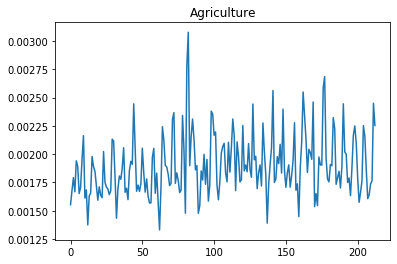

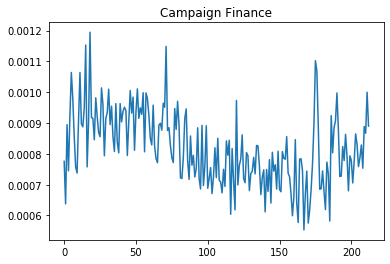

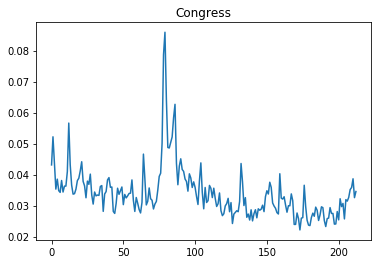

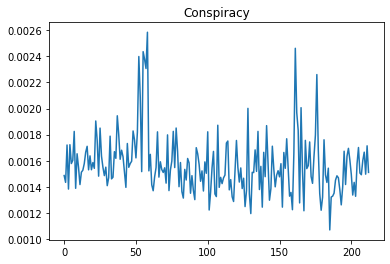

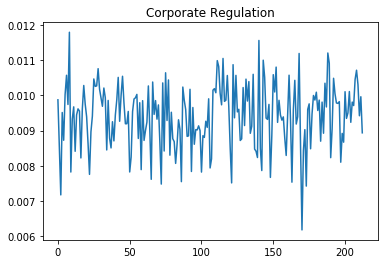

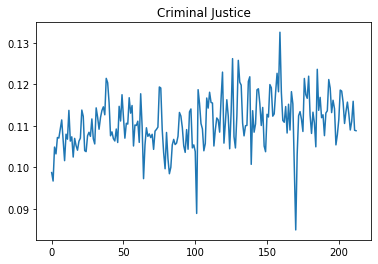

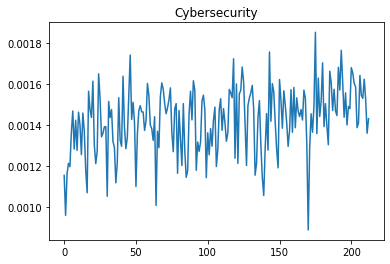

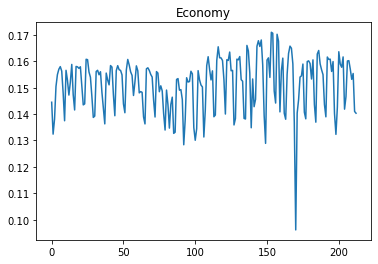

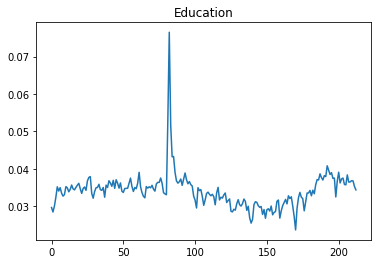

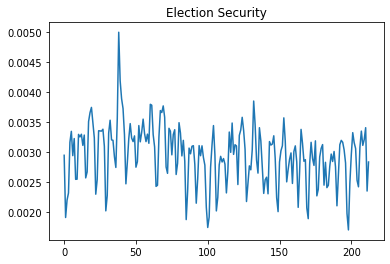

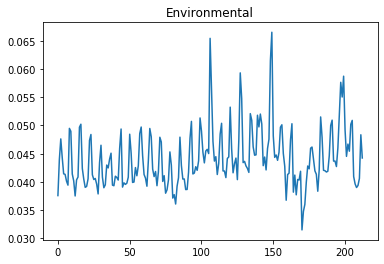

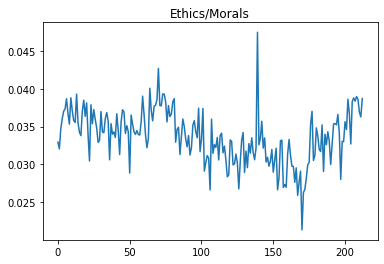

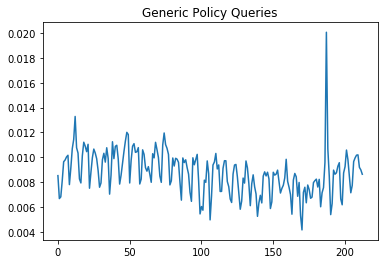

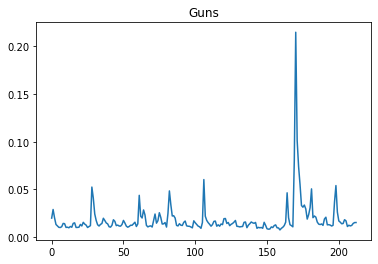

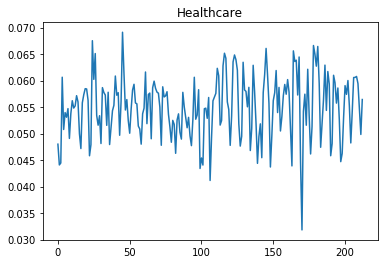

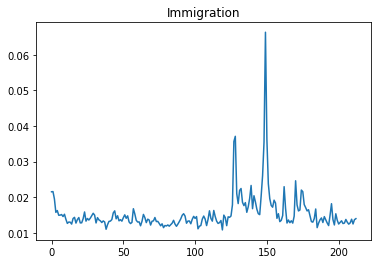

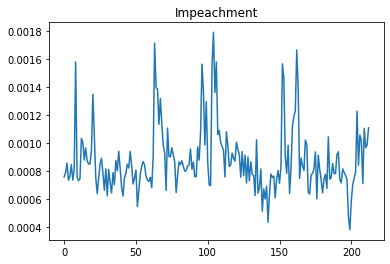

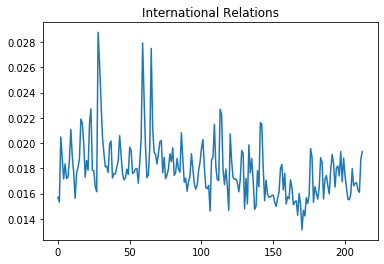

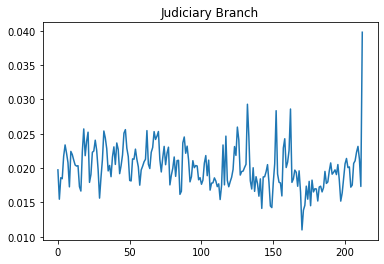

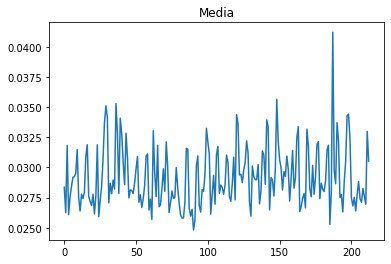

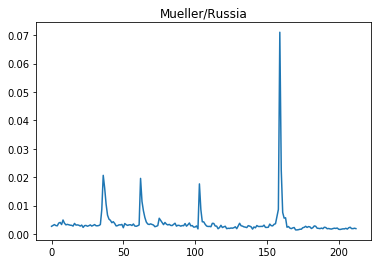

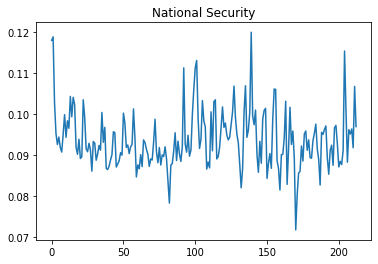

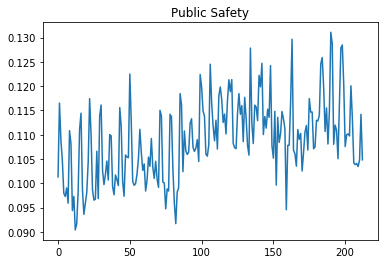

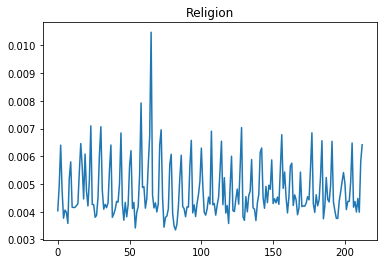

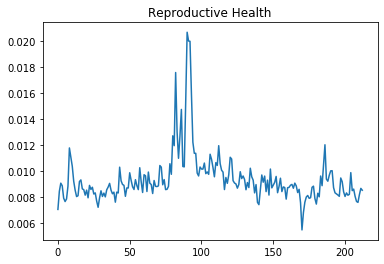

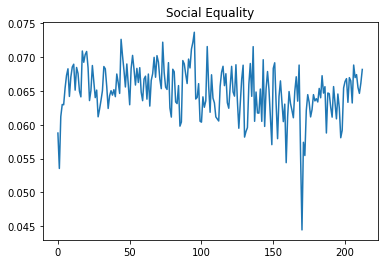

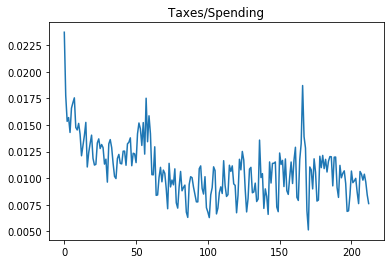

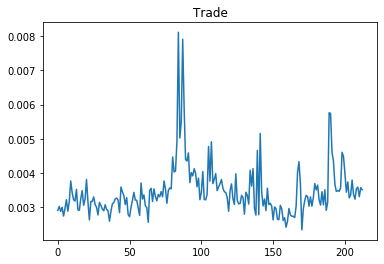

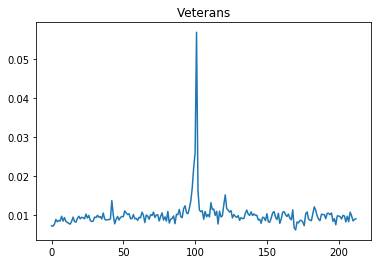

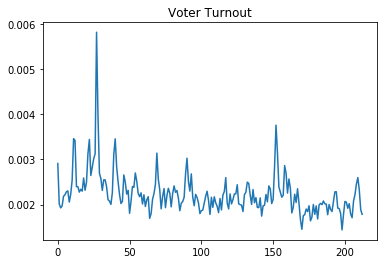

In [55]:
#Original data, no roll
reg_df_date = reg_df.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)
reg_cols = reg_df_date.columns
for i in reg_cols: 
    plt.plot(reg_df_date[i])
    plt.title(i)
    plt.show()

# Histograms
#### Distribution of each variable

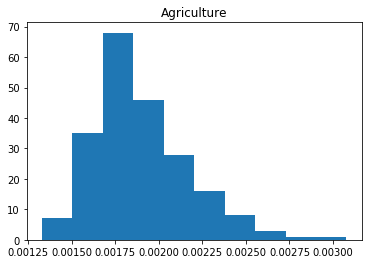

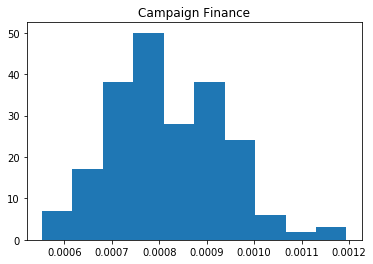

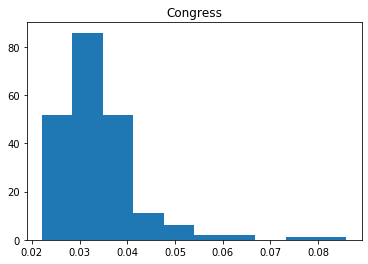

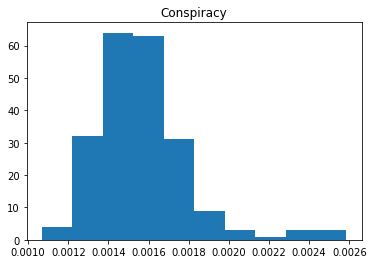

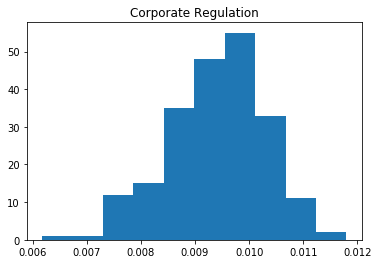

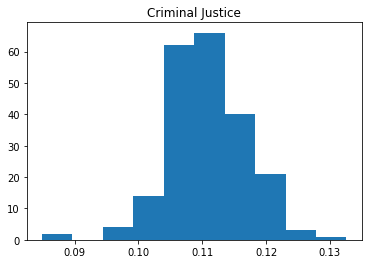

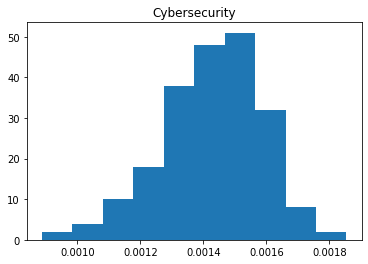

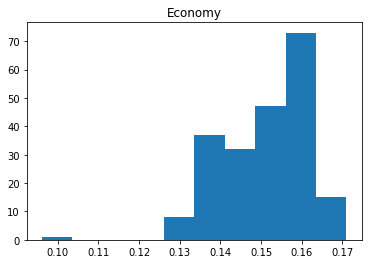

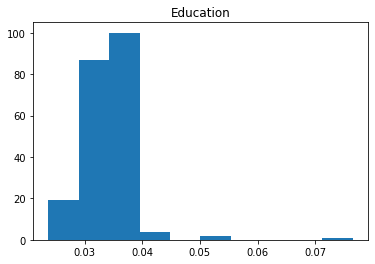

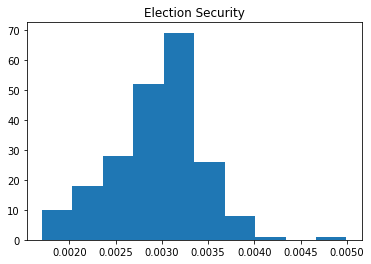

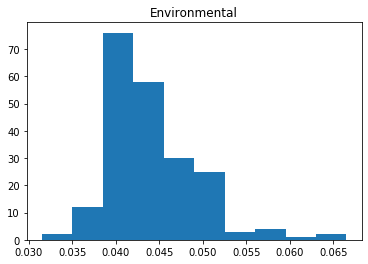

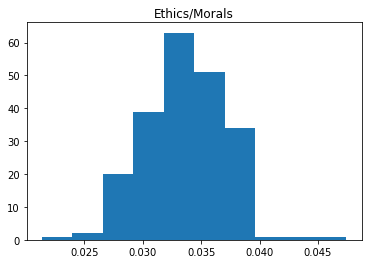

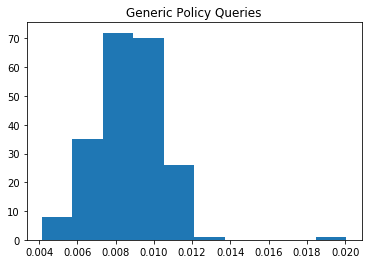

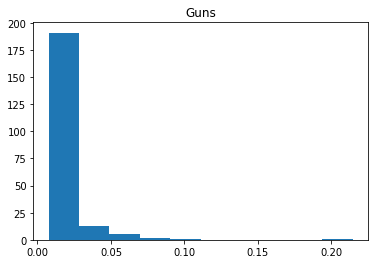

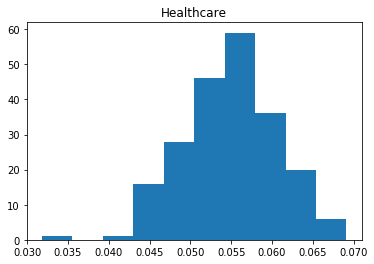

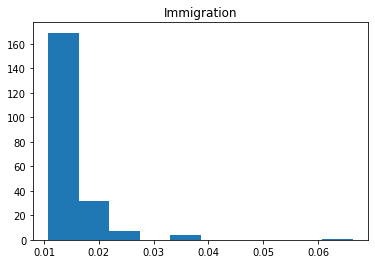

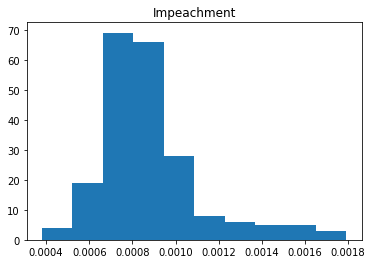

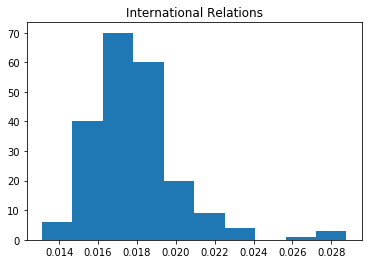

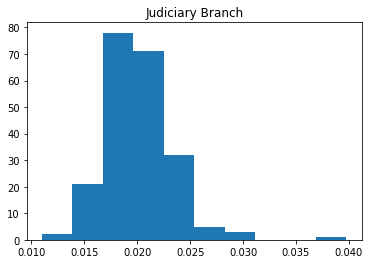

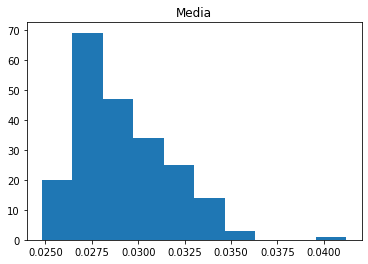

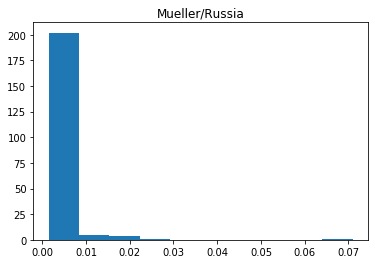

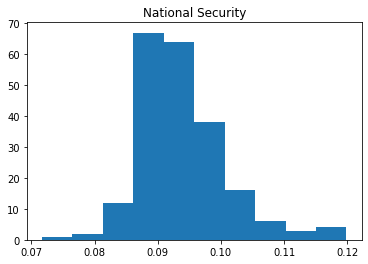

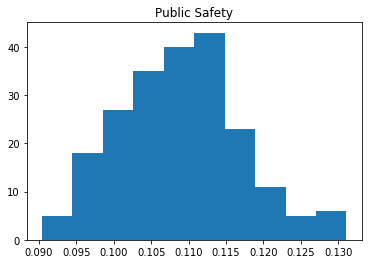

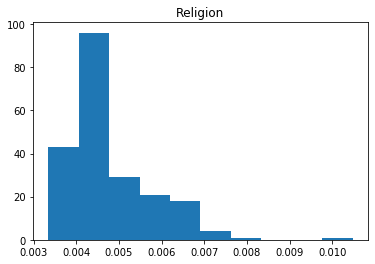

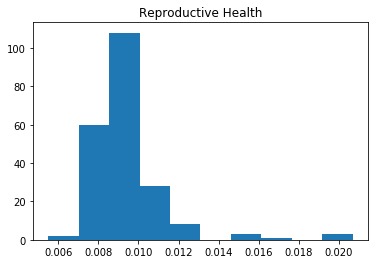

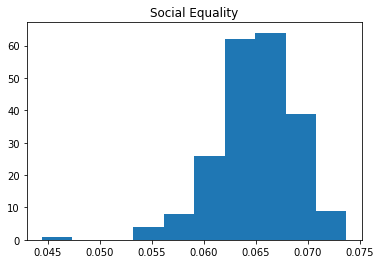

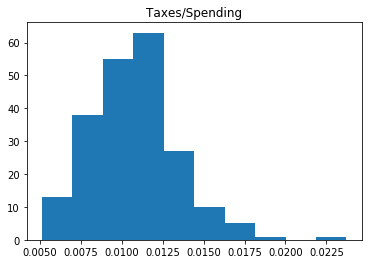

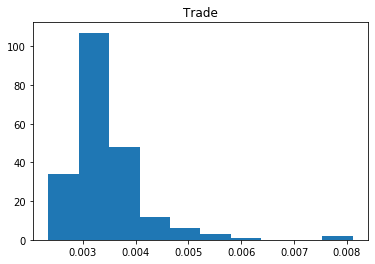

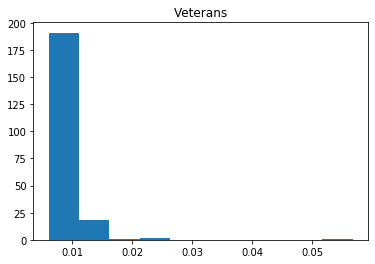

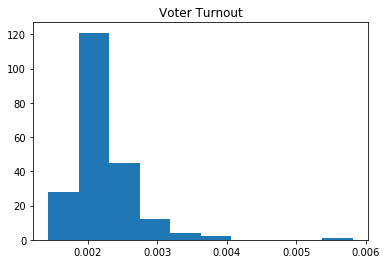

In [56]:
for i in reg_cols:
    plt.hist(reg_df_date[i])
    plt.title(i)
    plt.show()

# Rolling data
#### Use if you want to take a rolling average of the data

### rolling number give you a more steady average in term of weekly 

In [57]:
roll_7 = reg_df.set_index(['Date'])
roll_7 = roll_7.rolling(7).mean()
roll_7 = roll_7.dropna()
roll_7 = roll_7.reset_index()
roll_7.head()

,Date,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,...,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-21,0.001739,0.000860,0.040280,0.001561,0.009202,0.103865,0.001217,0.147907,0.032148,...,0.008146,0.061748,0.017215,0.002970,0.007936,0.002213,0.431458,0.568542,0.474020,0.525980
1,2019-02-22,0.001761,0.000872,0.039562,0.001609,0.009183,0.105679,0.001235,0.149595,0.032694,...,0.008403,0.063106,0.016333,0.002966,0.008286,0.002127,0.431255,0.568745,0.473949,0.526051
2,2019-02-23,0.001800,0.000889,0.037015,0.001603,0.009650,0.107100,0.001302,0.151819,0.033299,...,0.008879,0.064628,0.015904,0.002986,0.008472,0.002132,0.431139,0.568861,0.473909,0.526091
3,2019-02-24,0.001853,0.000866,0.035934,0.001593,0.009742,0.106632,0.001318,0.151730,0.033739,...,0.009164,0.065462,0.015788,0.003113,0.008721,0.002176,0.431176,0.568824,0.473922,0.526078
4,2019-02-25,0.001845,0.000890,0.036073,0.001617,0.009716,0.107312,0.001354,0.152608,0.034147,...,0.009378,0.066253,0.015710,0.003174,0.008647,0.002257,0.431262,0.568738,0.473952,0.526048


## Line plots for each variable after rolling data 
## Identify spikes and unusual behavior after rolling data 

In [58]:
roll_plot = roll_7.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)
roll_plot_cols = roll_plot.columns


In [59]:
roll_plot_cols

Index(['Agriculture', 'Campaign Finance', 'Congress', 'Conspiracy',
       'Corporate Regulation', 'Criminal Justice', 'Cybersecurity', 'Economy',
       'Education', 'Election Security', 'Environmental', 'Ethics/Morals',
       'Generic Policy Queries', 'Guns', 'Healthcare', 'Immigration',
       'Impeachment', 'International Relations', 'Judiciary Branch', 'Media',
       'Mueller/Russia', 'National Security', 'Public Safety', 'Religion',
       'Reproductive Health', 'Social Equality', 'Taxes/Spending', 'Trade',
       'Veterans', 'Voter Turnout'],
      dtype='object')

# Rolling Train/Test and data exploration
#### Replace X variables dataframe with non rolled version if necessary

In [60]:
# if not rolling data, rename this variable and replace throughout 
# x = reg_df.drop(...)
x_7 = roll_7.drop(columns={'Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'})

Hickenlooper_adj = roll_7['Hickenlooper_adj']
Gardner_adj = roll_7['Gardner_adj']



x_train_Hickenlooper_adj, x_test_Hickenlooper_adj, y_train_Hickenlooper_adj, y_test_Hickenlooper_adj = train_test_split(x_7, Hickenlooper_adj, test_size=0.3, random_state=42)
x_train_Gardner_adj, x_test_Gardner_adj, y_train_Gardner_adj, y_test_Gardner_adj = train_test_split(x_7, Gardner_adj, test_size=0.3, random_state=42)

### Train Test random split

In [61]:
#Hickenlooper_adj
reg_Hickenlooper_adj = LinearRegression().fit(x_train_Hickenlooper_adj, y_train_Hickenlooper_adj)
pred_train_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_train_Hickenlooper_adj)
pred_test_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_test_Hickenlooper_adj)
print('Hickenlooper_adj:: Train:', round(r2_score(y_train_Hickenlooper_adj,pred_train_Hickenlooper_adj),3),' Test:', round(r2_score(y_test_Hickenlooper_adj,pred_test_Hickenlooper_adj),3))

#Gardner_adj
reg_Gardner_adj = LinearRegression().fit(x_train_Gardner_adj, y_train_Gardner_adj)
pred_train_Gardner_adj = reg_Gardner_adj.predict(x_train_Gardner_adj)
pred_test_Gardner_adj = reg_Gardner_adj.predict(x_test_Gardner_adj)
print('Gardner_adj:: Train:', round(r2_score(y_train_Gardner_adj,pred_train_Gardner_adj),3),' Test:', round(r2_score(y_test_Gardner_adj,pred_test_Gardner_adj),3))



Hickenlooper_adj:: Train: 0.896  Test: 0.748
Gardner_adj:: Train: 0.896  Test: 0.748


### Train Test chronological split

In [62]:
Hickenlooper_adj_train = roll_7['Hickenlooper_adj'][:200]
Gardner_adj_train = roll_7['Gardner_adj'][:200]

Hickenlooper_adj_test = roll_7['Hickenlooper_adj'][200:]
Gardner_adj_test = roll_7['Gardner_adj'][200:]

x_7_train = x_7[:200]
x_7_test = x_7[200:]

In [63]:
x_7_test.describe()

,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,Election Security,...,Mueller/Russia,National Security,Public Safety,Religion,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.001866,0.000816,0.032072,0.001540,0.009907,0.113298,0.001535,0.154264,0.036755,0.002987,...,0.001939,0.096151,0.108421,0.004719,0.008390,0.066265,0.009558,0.003485,0.009220,0.002086
std,0.000022,0.000026,0.001813,0.000046,0.000142,0.001263,0.000017,0.001205,0.000244,0.000038,...,0.000096,0.001250,0.001840,0.000048,0.000145,0.000288,0.000039,0.000041,0.000117,0.000104
min,0.001839,0.000786,0.029557,0.001482,0.009689,0.111771,0.001520,0.152463,0.036401,0.002934,...,0.001768,0.094038,0.105626,0.004649,0.008203,0.066008,0.009508,0.003455,0.009065,0.001946
25%,0.001854,0.000796,0.030806,0.001501,0.009835,0.112532,0.001524,0.153425,0.036632,0.002963,...,0.001900,0.095588,0.107285,0.004695,0.008292,0.066100,0.009544,0.003462,0.009145,0.001997
50%,0.001859,0.000816,0.031898,0.001553,0.009935,0.112666,0.001530,0.154385,0.036782,0.002990,...,0.001982,0.096288,0.108414,0.004704,0.008380,0.066159,0.009546,0.003466,0.009191,0.002123
75%,0.001876,0.000828,0.033525,0.001573,0.010000,0.114267,0.001540,0.155176,0.036828,0.003004,...,0.002000,0.096962,0.109796,0.004748,0.008505,0.066334,0.009565,0.003488,0.009299,0.002173
max,0.001901,0.000859,0.034389,0.001597,0.010055,0.115048,0.001567,0.155795,0.037185,0.003050,...,0.002025,0.097627,0.110749,0.004795,0.008553,0.066818,0.009632,0.003573,0.009394,0.002191


In [64]:
#Hickenlooper_adj
reg_Hickenlooper_adj = LinearRegression().fit(x_7_train, Hickenlooper_adj_train)
pred_train_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_7_train)
pred_test_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_7_test)

print('Hickenlooper_adj:: Train:', round(r2_score(Hickenlooper_adj_train,pred_train_Hickenlooper_adj),3),' Test:', round(r2_score(Hickenlooper_adj_test,pred_test_Hickenlooper_adj),3))

#Gardner_adj
reg_Gardner_adj = LinearRegression().fit(x_7_train, Gardner_adj_train)
pred_train_Gardner_adj = reg_Gardner_adj.predict(x_7_train)
pred_test_Gardner_adj = reg_Gardner_adj.predict(x_7_test)
print('Gardner_adj:: Train:', round(r2_score(Gardner_adj_train,pred_train_Gardner_adj),3),' Test:', round(r2_score(Gardner_adj_test,pred_test_Gardner_adj),3))



Hickenlooper_adj:: Train: 0.876  Test: -414.336
Gardner_adj:: Train: 0.876  Test: -414.336


In [65]:
reg_Gardner_adj.score(x_7_test, Hickenlooper_adj_test)

-8487.74671668095

## PCA after Rolling data 

In [66]:
x_7.describe()

,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,Election Security,...,Mueller/Russia,National Security,Public Safety,Religion,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.001899,0.000818,0.033829,0.001571,0.009418,0.110937,0.001427,0.151314,0.034178,0.002959,...,0.003841,0.093357,0.108978,0.004751,0.009432,0.064951,0.010722,0.003467,0.009961,0.002245
std,0.000116,0.000082,0.006797,0.000132,0.000374,0.003475,0.000076,0.003990,0.003635,0.000245,...,0.002978,0.003453,0.005297,0.000282,0.001583,0.002191,0.001852,0.000563,0.002391,0.000321
min,0.001689,0.000656,0.025048,0.001353,0.008414,0.102511,0.001217,0.140457,0.028536,0.002472,...,0.001748,0.084723,0.098376,0.004256,0.007377,0.057564,0.008056,0.002692,0.007691,0.001762
25%,0.001810,0.000752,0.029062,0.001494,0.009181,0.107910,0.001370,0.149694,0.031671,0.002773,...,0.002454,0.091154,0.103867,0.004584,0.008565,0.063532,0.009348,0.003172,0.009115,0.002019
50%,0.001909,0.000799,0.033063,0.001544,0.009395,0.111545,0.001426,0.152163,0.034698,0.002927,...,0.003040,0.093076,0.108982,0.004718,0.009044,0.064949,0.010088,0.003324,0.009459,0.002177
75%,0.001961,0.000892,0.035491,0.001609,0.009641,0.113303,0.001484,0.153541,0.035784,0.003125,...,0.003606,0.094853,0.113393,0.004852,0.009663,0.066480,0.012060,0.003626,0.009915,0.002384
max,0.002315,0.000971,0.061214,0.002244,0.010418,0.119441,0.001589,0.160903,0.049086,0.003772,...,0.018176,0.102494,0.118393,0.005895,0.016507,0.069825,0.017215,0.005969,0.023249,0.003546


In [67]:
x_7['tot'] = x_7.sum(axis=1)
for i in x_7.columns:
    x_7[i] = x_7[i] / x_7.tot
x_7.drop(columns={'tot'},inplace=True)

In [68]:
fa_rd = FactorAnalyzer(n_factors=14, rotation='varimax')
fa_rd.fit(x_7)

factors = pd.DataFrame(fa_rd.loadings_, index=list(x_7.columns)).style.applymap(color_big_red)
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Agriculture,-0.399954,0.00120638,-0.14452,0.124194,0.0191181,-0.0365954,-0.00902932,0.0857512,-0.152146,-0.118118,0.833938,-0.113469,-0.104897,0.00189624
Campaign Finance,0.826733,-0.0732208,-0.131068,-0.137655,0.162315,-0.164276,0.0283442,-0.10025,0.187255,0.112838,-0.120044,0.166559,0.0718307,0.0947107
Congress,0.439991,-0.516818,-0.0902187,0.336667,0.0726031,0.0854008,-0.374026,0.0373667,0.0213565,-0.169236,0.227535,-0.0824344,0.316476,-0.0100024
Conspiracy,0.299344,-0.0636831,-0.0894831,-0.22173,0.0203638,0.113874,-0.112881,-0.0841183,0.223456,0.00352889,-0.106054,0.685948,-0.0181972,-0.0116135
Corporate Regulation,0.0895137,0.680388,0.121423,-0.0578525,0.0216635,-0.120607,0.0494368,-0.176724,0.114093,0.0933738,0.00314878,-0.255779,0.308724,0.0187783
Criminal Justice,-0.298566,0.606352,0.114005,-0.176096,-0.101756,0.444575,0.144068,-0.273412,-0.211201,-0.0980784,-0.126096,0.143751,-0.109519,0.0648696
Cybersecurity,-0.109603,0.734516,-0.171237,0.00773702,0.0362822,-0.147738,0.0203658,0.0322858,-0.215838,-0.0801559,0.0322983,0.0366308,-0.278647,0.323653
Economy,0.0521197,0.789501,0.261955,-0.241248,-0.218099,0.0912018,0.0781476,-0.0984029,0.16643,0.0561159,-0.123186,0.101127,-0.0329063,0.0305636
Education,0.446205,-0.246378,-0.281556,0.401538,0.46484,-0.128537,-0.125557,-0.119163,-0.00102911,-0.0961592,0.221623,-0.118604,-0.0453255,0.293367
Election Security,0.756786,0.131552,-0.144498,-0.125453,-0.00904688,0.153198,0.068512,-0.113918,-0.0130492,0.0602991,-0.0868606,0.293871,0.0330162,-0.24082


In [69]:
fa_rd.get_factor_variance()

(array([6.38994663, 3.68582146, 2.22117583, 2.12855769, 1.6171575 ,
        1.540666  , 1.32725407, 1.29972811, 1.17487581, 1.16512037,
        1.09757211, 0.96942991, 0.92864842, 0.60287486]),
 array([0.21299822, 0.12286072, 0.07403919, 0.07095192, 0.05390525,
        0.05135553, 0.0442418 , 0.04332427, 0.03916253, 0.03883735,
        0.03658574, 0.03231433, 0.03095495, 0.02009583]),
 array([0.21299822, 0.33585894, 0.40989813, 0.48085005, 0.5347553 ,
        0.58611084, 0.63035264, 0.67367691, 0.71283944, 0.75167678,
        0.78826252, 0.82057685, 0.8515318 , 0.87162763]))

## Z-score variables if needed 

In [70]:
#from scipy.stats import zscore
#x_7 = x_7.apply(zscore)

# Regression
#### Recommend naming variables per candidate as in steyer_baseline instead of just baseline
#### Adjust first line for model without a constant(intercept)

### Repeat per candidate -- Gardner 

In [71]:
Gardner_adj_baseline = sm.add_constant(x_7)
mod = sm.OLS(Gardner_adj, Gardner_adj_baseline)
res = mod.fit()
print(res.summary())
# This is the baseline model with all variables

                            OLS Regression Results                            
Dep. Variable:            Gardner_adj   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     40.83
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.46e-63
Time:                        16:28:26   Log-Likelihood:                 777.87
No. Observations:                 207   AIC:                            -1496.
Df Residuals:                     177   BIC:                            -1396.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\boai-\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [72]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Healthcare'], axis = 1)

In [73]:
Gardner_adj_final_1 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_1)
res = mod.fit()
res.summary()
#print(res.summary())
# This is the final model with significant variables remaining

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     40.83
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.46e-63
Time:                        16:28:42   Log-Likelihood:                 777.87
No. Observations:                 207   AIC:                            -1496.
Df Residuals:                     177   BIC:                            -1396.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2179      0.490      0.445      0.657      -0.749       1.185
Agriculture                 4.8991      7.855      0.624      0.534     -10.603      20.401
Campaign Finance           44.6901     14.833      3.013      0.003      15.418      73.962
Congress                    0.7921      0.481      1.646      0.102      -0.158       1.742
Conspiracy                -35.8644      5.016     -7.150      0.000     -45.763     -25.966
Corporate Regulation        4.4435      2.347      1.893      0.060      -0.188       9.075
Criminal Justice           -0.3745      0.608     -0.616      0.539      -1.575       0.826
Cybersecurity              -6.6252     12.489     -0.530      0.596     -31.272      18.021
Economy                     0.3437      0.597      0.576      0.565      -0.834       1.521
Education                  -0.6956      0.548     -1.269      0.206      -1.777       0.386
Election Security           0.9640      4.089      0.236      0.814      -7.105       9.033
Environmental               1.4844      0.486      3.054      0.003       0.525       2.444
Ethics/Morals              -0.7336      0.523     -1.403      0.162      -1.766       0.298
Generic Policy Queries     -0.2578      1.385     -0.186      0.853      -2.992       2.476
Guns                        0.4242      0.496      0.856      0.393      -0.554       1.402
Immigration                -0.4259      0.565     -0.753      0.452      -1.542       0.690
Impeachment                -3.8790      4.819     -0.805      0.422     -13.389       5.631
International Relations     3.6814      0.946      3.892      0.000       1.815       5.548
Judiciary Branch            0.7967      0.635      1.254      0.212      -0.457       2.051
Media                      -0.0235      0.844     -0.028      0.978      -1.689       1.641
Mueller/Russia              0.7492      0.606      1.236      0.218      -0.447       1.946
National Security           2.3260      0.550      4.227      0.000       1.240       3.412
Public Safety              -0.8819      0.572     -1.543      0.125      -2.010       0.246
Religion                  -14.6332      2.795     -5.235      0.000     -20.149      -9.117
Reproductive Health         1.3750      0.732      1.878      0.062      -0.070       2.820
Social Equality             0.3436      0.914      0.376      0.707      -1.460       2.147
Taxes/Spending              1.3438      0.764      1.759      0.080      -0.164       2.852
Trade                      -2.6847      1.828     -1.469      0.144      -6.291       0.922
Veterans                   -0.7575      0.571     -1.326      0.187      -1.885       0.370
Voter Turnout              -0.3286      2.636     -0.125      0.901      -5.531       4.874
===============================================

In [74]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Media'], axis = 1)

In [75]:
Gardner_adj_final_2 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     42.53
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           2.21e-64
Time:                        16:28:43   Log-Likelihood:                 777.87
No. Observations:                 207   AIC:                            -1498.
Df Residuals:                     178   BIC:                            -1401.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2128      0.454      0.469      0.640      -0.683       1.108
Agriculture                 4.8674      7.751      0.628      0.531     -10.428      20.162
Campaign Finance           44.5914     14.364      3.104      0.002      16.247      72.936
Congress                    0.7981      0.430      1.857      0.065      -0.050       1.646
Conspiracy                -35.8244      4.793     -7.475      0.000     -45.282     -26.367
Corporate Regulation        4.4531      2.315      1.924      0.056      -0.115       9.021
Criminal Justice           -0.3693      0.577     -0.640      0.523      -1.508       0.769
Cybersecurity              -6.5350     12.028     -0.543      0.588     -30.272      17.202
Economy                     0.3494      0.559      0.625      0.533      -0.753       1.452
Education                  -0.6900      0.509     -1.356      0.177      -1.694       0.314
Election Security           0.9317      3.910      0.238      0.812      -6.783       8.647
Environmental               1.4859      0.482      3.084      0.002       0.535       2.437
Ethics/Morals              -0.7311      0.513     -1.424      0.156      -1.744       0.282
Generic Policy Queries     -0.2604      1.378     -0.189      0.850      -2.980       2.459
Guns                        0.4284      0.471      0.909      0.365      -0.502       1.358
Immigration                -0.4218      0.544     -0.776      0.439      -1.495       0.651
Impeachment                -3.8523      4.709     -0.818      0.414     -13.146       5.441
International Relations     3.6873      0.920      4.009      0.000       1.872       5.502
Judiciary Branch            0.8030      0.592      1.355      0.177      -0.366       1.972
Mueller/Russia              0.7516      0.598      1.256      0.211      -0.429       1.932
National Security           2.3310      0.519      4.492      0.000       1.307       3.355
Public Safety              -0.8795      0.563     -1.561      0.120      -1.991       0.232
Religion                  -14.6212      2.754     -5.309      0.000     -20.056      -9.187
Reproductive Health         1.3762      0.729      1.887      0.061      -0.063       2.815
Social Equality             0.3540      0.832      0.426      0.671      -1.287       1.995
Taxes/Spending              1.3458      0.759      1.774      0.078      -0.152       2.843
Trade                      -2.6790      1.811     -1.479      0.141      -6.252       0.894
Veterans                   -0.7559      0.567     -1.333      0.184      -1.875       0.363
Voter Turnout              -0.3487      2.529     -0.138      0.891      -5.340       4.643
==============================================================================
Omnibus:                        8.251   Durbin-Watson:      

In [76]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Voter Turnout'], axis = 1)

In [77]:
Gardner_adj_final_3 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     44.35
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           3.31e-65
Time:                        16:28:43   Log-Likelihood:                 777.85
No. Observations:                 207   AIC:                            -1500.
Df Residuals:                     179   BIC:                            -1406.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1844      0.403      0.457      0.648      -0.611       0.980
Agriculture                 5.4556      6.452      0.846      0.399      -7.277      18.188
Campaign Finance           44.2239     14.075      3.142      0.002      16.449      71.999
Congress                    0.8212      0.395      2.081      0.039       0.043       1.600
Conspiracy                -35.8971      4.750     -7.557      0.000     -45.271     -26.523
Corporate Regulation        4.4834      2.298      1.951      0.053      -0.051       9.018
Criminal Justice           -0.3332      0.513     -0.650      0.517      -1.345       0.678
Cybersecurity              -6.2535     11.821     -0.529      0.597     -29.581      17.074
Economy                     0.3649      0.546      0.668      0.505      -0.712       1.442
Education                  -0.6742      0.494     -1.364      0.174      -1.650       0.301
Election Security           1.1529      3.555      0.324      0.746      -5.863       8.169
Environmental               1.5158      0.429      3.533      0.001       0.669       2.362
Ethics/Morals              -0.6936      0.434     -1.598      0.112      -1.550       0.163
Generic Policy Queries     -0.1862      1.266     -0.147      0.883      -2.684       2.311
Guns                        0.4572      0.421      1.085      0.279      -0.374       1.288
Immigration                -0.3992      0.517     -0.772      0.441      -1.420       0.621
Impeachment                -3.7938      4.677     -0.811      0.418     -13.024       5.436
International Relations     3.6912      0.917      4.027      0.000       1.882       5.500
Judiciary Branch            0.8203      0.577      1.421      0.157      -0.319       1.960
Mueller/Russia              0.7757      0.571      1.359      0.176      -0.350       1.902
National Security           2.3566      0.483      4.876      0.000       1.403       3.310
Public Safety              -0.8412      0.489     -1.721      0.087      -1.806       0.124
Religion                  -14.4788      2.546     -5.687      0.000     -19.503      -9.455
Reproductive Health         1.3966      0.712      1.961      0.051      -0.008       2.802
Social Equality             0.3838      0.801      0.479      0.632      -1.196       1.964
Taxes/Spending              1.4002      0.646      2.167      0.032       0.125       2.675
Trade                      -2.6126      1.741     -1.501      0.135      -6.048       0.822
Veterans                   -0.7253      0.520     -1.394      0.165      -1.752       0.301
==============================================================================
Omnibus:                        8.246   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                

In [78]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Generic Policy Queries'], axis = 1)

In [79]:
Gardner_adj_final_4 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_4)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     46.31
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           4.86e-66
Time:                        16:28:43   Log-Likelihood:                 777.84
No. Observations:                 207   AIC:                            -1502.
Df Residuals:                     180   BIC:                            -1412.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1519      0.336      0.452      0.652      -0.512       0.816
Agriculture                 5.8881      5.729      1.028      0.305      -5.416      17.192
Campaign Finance           43.5095     13.176      3.302      0.001      17.511      69.508
Congress                    0.8476      0.350      2.419      0.017       0.156       1.539
Conspiracy                -35.9770      4.706     -7.644      0.000     -45.264     -26.690
Corporate Regulation        4.5523      2.244      2.029      0.044       0.125       8.980
Criminal Justice           -0.3009      0.462     -0.651      0.516      -1.213       0.611
Cybersecurity              -5.9615     11.622     -0.513      0.609     -28.894      16.971
Economy                     0.4004      0.488      0.820      0.413      -0.563       1.364
Education                  -0.6492      0.463     -1.402      0.163      -1.563       0.264
Election Security           1.2426      3.493      0.356      0.722      -5.650       8.135
Environmental               1.5383      0.400      3.849      0.000       0.750       2.327
Ethics/Morals              -0.6766      0.417     -1.621      0.107      -1.500       0.147
Guns                        0.4928      0.344      1.433      0.154      -0.186       1.171
Immigration                -0.3566      0.427     -0.834      0.405      -1.200       0.487
Impeachment                -3.8610      4.642     -0.832      0.407     -13.022       5.300
International Relations     3.7471      0.832      4.504      0.000       2.105       5.389
Judiciary Branch            0.8524      0.533      1.599      0.112      -0.199       1.904
Mueller/Russia              0.8161      0.499      1.635      0.104      -0.169       1.801
National Security           2.3999      0.382      6.278      0.000       1.646       3.154
Public Safety              -0.8089      0.436     -1.856      0.065      -1.669       0.051
Religion                  -14.4558      2.534     -5.704      0.000     -19.457      -9.455
Reproductive Health         1.4171      0.696      2.035      0.043       0.043       2.791
Social Equality             0.4198      0.761      0.552      0.582      -1.081       1.921
Taxes/Spending              1.4257      0.621      2.296      0.023       0.200       2.651
Trade                      -2.5622      1.702     -1.505      0.134      -5.921       0.796
Veterans                   -0.6906      0.463     -1.493      0.137      -1.603       0.222
==============================================================================
Omnibus:                        8.352   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                4.329
Skew:                           0.111   Prob(JB):                        0.115
Kurtosi

In [80]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Election Security'], axis = 1)

In [81]:
Gardner_adj_final_5 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_5)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     48.39
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           7.34e-67
Time:                        16:28:43   Log-Likelihood:                 777.77
No. Observations:                 207   AIC:                            -1504.
Df Residuals:                     181   BIC:                            -1417.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1790      0.327      0.548      0.585      -0.466       0.824
Agriculture                 5.8222      5.712      1.019      0.309      -5.448      17.093
Campaign Finance           43.8488     13.109      3.345      0.001      17.982      69.715
Congress                    0.8162      0.338      2.413      0.017       0.149       1.484
Conspiracy                -35.6563      4.608     -7.738      0.000     -44.749     -26.564
Corporate Regulation        4.3503      2.166      2.009      0.046       0.077       8.623
Criminal Justice           -0.3092      0.460     -0.672      0.503      -1.218       0.599
Cybersecurity              -6.9420     11.263     -0.616      0.538     -29.166      15.282
Economy                     0.3923      0.487      0.806      0.421      -0.568       1.352
Education                  -0.6709      0.458     -1.465      0.145      -1.574       0.232
Environmental               1.5049      0.388      3.883      0.000       0.740       2.270
Ethics/Morals              -0.7212      0.397     -1.816      0.071      -1.505       0.062
Guns                        0.4650      0.334      1.392      0.166      -0.194       1.124
Immigration                -0.3857      0.419     -0.921      0.358      -1.212       0.440
Impeachment                -4.0076      4.613     -0.869      0.386     -13.110       5.094
International Relations     3.7595      0.829      4.534      0.000       2.123       5.396
Judiciary Branch            0.8565      0.532      1.611      0.109      -0.193       1.906
Mueller/Russia              0.7798      0.487      1.600      0.111      -0.182       1.741
National Security           2.3639      0.368      6.429      0.000       1.638       3.089
Public Safety              -0.8578      0.412     -2.080      0.039      -1.672      -0.044
Religion                  -14.6276      2.482     -5.894      0.000     -19.525      -9.731
Reproductive Health         1.3657      0.680      2.010      0.046       0.025       2.707
Social Equality             0.4367      0.757      0.577      0.565      -1.057       1.931
Taxes/Spending              1.3450      0.577      2.333      0.021       0.207       2.483
Trade                      -2.6089      1.693     -1.541      0.125      -5.949       0.732
Veterans                   -0.7291      0.449     -1.625      0.106      -1.614       0.156
==============================================================================
Omnibus:                        8.530   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.422
Skew:                           0.118   Prob(JB):                        0.110
Kurtosis:                       2.324   Cond. No.                     3.41e+04
====================

In [82]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Social Equality'], axis = 1)

In [83]:
Gardner_adj_final_6 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_6)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     50.57
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.20e-67
Time:                        16:28:43   Log-Likelihood:                 777.58
No. Observations:                 207   AIC:                            -1505.
Df Residuals:                     182   BIC:                            -1422.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3291      0.197      1.667      0.097      -0.060       0.719
Agriculture                 5.1285      5.574      0.920      0.359      -5.868      16.126
Campaign Finance           43.8166     13.085      3.349      0.001      17.999      69.635
Congress                    0.6698      0.223      3.003      0.003       0.230       1.110
Conspiracy                -34.6590      4.263     -8.129      0.000     -43.071     -26.247
Corporate Regulation        3.8545      1.984      1.943      0.054      -0.060       7.769
Criminal Justice           -0.4903      0.336     -1.459      0.146      -1.154       0.173
Cybersecurity              -8.4624     10.930     -0.774      0.440     -30.028      13.103
Economy                     0.2622      0.430      0.609      0.543      -0.587       1.111
Education                  -0.8370      0.355     -2.356      0.020      -1.538      -0.136
Environmental               1.4063      0.347      4.051      0.000       0.721       2.091
Ethics/Morals              -0.7520      0.393     -1.914      0.057      -1.527       0.023
Guns                        0.3194      0.219      1.462      0.146      -0.112       0.751
Immigration                -0.5676      0.275     -2.068      0.040      -1.109      -0.026
Impeachment                -4.0630      4.603     -0.883      0.379     -13.146       5.020
International Relations     3.4877      0.681      5.121      0.000       2.144       4.831
Judiciary Branch            0.7638      0.506      1.510      0.133      -0.234       1.762
Mueller/Russia              0.5745      0.332      1.730      0.085      -0.081       1.230
National Security           2.2361      0.293      7.634      0.000       1.658       2.814
Public Safety              -1.0143      0.310     -3.271      0.001      -1.626      -0.402
Religion                  -14.5341      2.472     -5.880      0.000     -19.412      -9.657
Reproductive Health         1.4710      0.653      2.251      0.026       0.182       2.760
Taxes/Spending              1.1646      0.484      2.409      0.017       0.211       2.119
Trade                      -2.8542      1.636     -1.745      0.083      -6.081       0.373
Veterans                   -0.8750      0.370     -2.367      0.019      -1.604      -0.146
==============================================================================
Omnibus:                        7.999   Durbin-Watson:                   0.367
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.385
Skew:                           0.139   Prob(JB):                        0.112
Kurtosis:                       2.343   Cond. No.                     3.40e+04
==============================================================================

Warnings:
[1] Standard Errors as

In [84]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Economy'], axis = 1)

In [85]:
Gardner_adj_final_7 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_7)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     52.94
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.95e-68
Time:                        16:28:44   Log-Likelihood:                 777.37
No. Observations:                 207   AIC:                            -1507.
Df Residuals:                     183   BIC:                            -1427.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4259      0.117      3.641      0.000       0.195       0.657
Agriculture                 4.8582      5.546      0.876      0.382      -6.085      15.801
Campaign Finance           41.6223     12.558      3.314      0.001      16.845      66.399
Congress                    0.5921      0.183      3.241      0.001       0.232       0.952
Conspiracy                -34.6667      4.256     -8.145      0.000     -43.064     -26.269
Corporate Regulation        3.5380      1.911      1.851      0.066      -0.233       7.309
Criminal Justice           -0.5312      0.329     -1.616      0.108      -1.180       0.117
Cybersecurity              -6.5643     10.458     -0.628      0.531     -27.199      14.070
Education                  -0.9424      0.310     -3.042      0.003      -1.554      -0.331
Environmental               1.3208      0.317      4.167      0.000       0.695       1.946
Ethics/Morals              -0.8948      0.315     -2.842      0.005      -1.516      -0.274
Guns                        0.2100      0.124      1.691      0.092      -0.035       0.455
Immigration                -0.6552      0.233     -2.806      0.006      -1.116      -0.194
Impeachment                -3.7404      4.565     -0.819      0.414     -12.747       5.266
International Relations     3.4268      0.672      5.096      0.000       2.100       4.754
Judiciary Branch            0.6102      0.438      1.394      0.165      -0.254       1.474
Mueller/Russia              0.4514      0.263      1.715      0.088      -0.068       0.971
National Security           2.1644      0.268      8.083      0.000       1.636       2.693
Public Safety              -1.0920      0.282     -3.870      0.000      -1.649      -0.535
Religion                  -14.4642      2.465     -5.868      0.000     -19.328      -9.601
Reproductive Health         1.2331      0.523      2.358      0.019       0.201       2.265
Taxes/Spending              1.1811      0.482      2.451      0.015       0.230       2.132
Trade                      -2.8243      1.632     -1.730      0.085      -6.044       0.396
Veterans                   -1.0076      0.298     -3.378      0.001      -1.596      -0.419
==============================================================================
Omnibus:                        8.405   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                4.790
Skew:                           0.177   Prob(JB):                       0.0912
Kurtosis:                       2.344   Cond. No.                     3.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

In [86]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Cybersecurity'], axis = 1)

In [87]:
Gardner_adj_final_8 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_8)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     55.51
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           3.14e-69
Time:                        16:28:44   Log-Likelihood:                 777.15
No. Observations:                 207   AIC:                            -1508.
Df Residuals:                     184   BIC:                            -1432.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4090      0.114      3.599      0.000       0.185       0.633
Agriculture                 4.4219      5.493      0.805      0.422      -6.416      15.260
Campaign Finance           40.6379     12.439      3.267      0.001      16.096      65.180
Congress                    0.6311      0.171      3.680      0.000       0.293       0.969
Conspiracy                -34.9871      4.218     -8.294      0.000     -43.310     -26.664
Corporate Regulation        3.3144      1.875      1.768      0.079      -0.384       7.013
Criminal Justice           -0.5402      0.328     -1.647      0.101      -1.187       0.107
Education                  -0.9549      0.309     -3.094      0.002      -1.564      -0.346
Environmental               1.3108      0.316      4.147      0.000       0.687       1.934
Ethics/Morals              -0.8905      0.314     -2.834      0.005      -1.510      -0.271
Guns                        0.2277      0.121      1.886      0.061      -0.010       0.466
Immigration                -0.6131      0.223     -2.746      0.007      -1.054      -0.173
Impeachment                -3.7109      4.557     -0.814      0.417     -12.702       5.280
International Relations     3.6359      0.583      6.234      0.000       2.485       4.787
Judiciary Branch            0.5856      0.435      1.345      0.180      -0.273       1.444
Mueller/Russia              0.5131      0.244      2.105      0.037       0.032       0.994
National Security           2.2307      0.246      9.082      0.000       1.746       2.715
Public Safety              -1.0847      0.281     -3.854      0.000      -1.640      -0.529
Religion                  -14.8213      2.395     -6.190      0.000     -19.546     -10.097
Reproductive Health         1.2270      0.522      2.350      0.020       0.197       2.257
Taxes/Spending              1.2392      0.472      2.624      0.009       0.308       2.171
Trade                      -2.7571      1.626     -1.696      0.092      -5.965       0.451
Veterans                   -1.0143      0.298     -3.408      0.001      -1.602      -0.427
==============================================================================
Omnibus:                        9.962   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                5.389
Skew:                           0.192   Prob(JB):                       0.0676
Kurtosis:                       2.309   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other 

In [88]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Impeachment'], axis = 1)

In [89]:
Gardner_adj_final_9 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_9)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     58.23
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.61e-70
Time:                        16:28:45   Log-Likelihood:                 776.77
No. Observations:                 207   AIC:                            -1510.
Df Residuals:                     185   BIC:                            -1436.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3988      0.113      3.534      0.001       0.176       0.621
Agriculture                 3.4463      5.356      0.643      0.521      -7.121      14.014
Campaign Finance           40.3582     12.423      3.249      0.001      15.849      64.867
Congress                    0.6246      0.171      3.649      0.000       0.287       0.962
Conspiracy                -34.9041      4.213     -8.284      0.000     -43.216     -26.592
Corporate Regulation        2.8827      1.797      1.605      0.110      -0.662       6.427
Criminal Justice           -0.4855      0.321     -1.514      0.132      -1.118       0.147
Education                  -0.8985      0.301     -2.990      0.003      -1.491      -0.306
Environmental               1.2141      0.293      4.149      0.000       0.637       1.791
Ethics/Morals              -0.8501      0.310     -2.742      0.007      -1.462      -0.238
Guns                        0.2222      0.120      1.845      0.067      -0.015       0.460
Immigration                -0.5297      0.198     -2.672      0.008      -0.921      -0.139
International Relations     3.8519      0.519      7.423      0.000       2.828       4.876
Judiciary Branch            0.5226      0.428      1.221      0.224      -0.322       1.367
Mueller/Russia              0.4815      0.240      2.003      0.047       0.007       0.956
National Security           2.2433      0.245      9.159      0.000       1.760       2.726
Public Safety              -1.0198      0.270     -3.781      0.000      -1.552      -0.488
Religion                  -15.6551      2.163     -7.239      0.000     -19.922     -11.389
Reproductive Health         1.1429      0.511      2.235      0.027       0.134       2.152
Taxes/Spending              1.2696      0.470      2.700      0.008       0.342       2.197
Trade                      -2.6655      1.621     -1.645      0.102      -5.863       0.532
Veterans                   -1.0854      0.284     -3.818      0.000      -1.646      -0.525
==============================================================================
Omnibus:                       12.116   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.018
Skew:                           0.197   Prob(JB):                       0.0493
Kurtosis:                       2.263   Cond. No.                     3.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Agriculture'], axis = 1)

In [91]:
Gardner_adj_final_10 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_10)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     61.31
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           8.65e-71
Time:                        16:28:45   Log-Likelihood:                 776.54
No. Observations:                 207   AIC:                            -1511.
Df Residuals:                     186   BIC:                            -1441.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4217      0.107      3.943      0.000       0.211       0.633
Campaign Finance           38.0799     11.889      3.203      0.002      14.625      61.534
Congress                    0.6205      0.171      3.634      0.000       0.284       0.957
Conspiracy                -34.6755      4.192     -8.272      0.000     -42.945     -26.406
Corporate Regulation        2.9018      1.794      1.618      0.107      -0.637       6.440
Criminal Justice           -0.5384      0.309     -1.740      0.084      -1.149       0.072
Education                  -0.8671      0.296     -2.929      0.004      -1.451      -0.283
Environmental               1.1460      0.272      4.207      0.000       0.609       1.683
Ethics/Morals              -0.8594      0.309     -2.780      0.006      -1.469      -0.249
Guns                        0.2022      0.116      1.741      0.083      -0.027       0.431
Immigration                -0.5088      0.195     -2.606      0.010      -0.894      -0.124
International Relations     3.8149      0.515      7.409      0.000       2.799       4.831
Judiciary Branch            0.4773      0.421      1.132      0.259      -0.354       1.309
Mueller/Russia              0.4857      0.240      2.024      0.044       0.012       0.959
National Security           2.2085      0.239      9.260      0.000       1.738       2.679
Public Safety              -1.0032      0.268     -3.743      0.000      -1.532      -0.474
Religion                  -15.6947      2.158     -7.272      0.000     -19.953     -11.437
Reproductive Health         1.0158      0.471      2.158      0.032       0.087       1.945
Taxes/Spending              1.2008      0.457      2.626      0.009       0.299       2.103
Trade                      -2.5365      1.606     -1.580      0.116      -5.704       0.631
Veterans                   -1.0669      0.282     -3.778      0.000      -1.624      -0.510
==============================================================================
Omnibus:                       12.032   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.851
Skew:                           0.182   Prob(JB):                       0.0536
Kurtosis:                       2.261   Cond. No.                     2.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Judiciary Branch'], axis = 1)

In [93]:
Gardner_adj_final_11 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_11)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     64.37
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.99e-71
Time:                        16:28:46   Log-Likelihood:                 775.83
No. Observations:                 207   AIC:                            -1512.
Df Residuals:                     187   BIC:                            -1445.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4941      0.086      5.762      0.000       0.325       0.663
Campaign Finance           38.7894     11.881      3.265      0.001      15.351      62.228
Congress                    0.5371      0.154      3.484      0.001       0.233       0.841
Conspiracy                -34.8412      4.192     -8.311      0.000     -43.112     -26.571
Corporate Regulation        2.4923      1.758      1.418      0.158      -0.976       5.960
Criminal Justice           -0.6497      0.294     -2.212      0.028      -1.229      -0.070
Education                  -0.9476      0.288     -3.295      0.001      -1.515      -0.380
Environmental               1.0437      0.257      4.058      0.000       0.536       1.551
Ethics/Morals              -0.9267      0.304     -3.052      0.003      -1.526      -0.328
Guns                        0.1186      0.090      1.321      0.188      -0.058       0.296
Immigration                -0.5527      0.192     -2.886      0.004      -0.930      -0.175
International Relations     3.8538      0.514      7.495      0.000       2.840       4.868
Mueller/Russia              0.4929      0.240      2.053      0.041       0.019       0.966
National Security           2.1351      0.230      9.295      0.000       1.682       2.588
Public Safety              -1.1368      0.241     -4.719      0.000      -1.612      -0.662
Religion                  -16.1781      2.117     -7.641      0.000     -20.355     -12.001
Reproductive Health         0.9579      0.468      2.045      0.042       0.034       1.882
Taxes/Spending              1.0187      0.428      2.378      0.018       0.174       1.864
Trade                      -2.3780      1.601     -1.486      0.139      -5.536       0.780
Veterans                   -1.1191      0.279     -4.014      0.000      -1.669      -0.569
==============================================================================
Omnibus:                        8.615   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                5.164
Skew:                           0.211   Prob(JB):                       0.0756
Kurtosis:                       2.351   Cond. No.                     2.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Guns'], axis = 1)

In [95]:
Gardner_adj_final_12 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_12)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     67.59
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.62e-72
Time:                        16:28:46   Log-Likelihood:                 774.87
No. Observations:                 207   AIC:                            -1512.
Df Residuals:                     188   BIC:                            -1448.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5921      0.043     13.725      0.000       0.507       0.677
Campaign Finance           33.8928     11.311      2.996      0.003      11.580      56.206
Congress                    0.4295      0.131      3.275      0.001       0.171       0.688
Conspiracy                -34.7598      4.200     -8.276      0.000     -43.045     -26.474
Corporate Regulation        1.3467      1.532      0.879      0.381      -1.676       4.370
Criminal Justice           -0.8389      0.257     -3.265      0.001      -1.346      -0.332
Education                  -1.0566      0.276     -3.828      0.000      -1.601      -0.512
Environmental               0.8843      0.228      3.886      0.000       0.435       1.333
Ethics/Morals              -1.0656      0.285     -3.733      0.000      -1.629      -0.503
Immigration                -0.6310      0.182     -3.458      0.001      -0.991      -0.271
International Relations     3.8583      0.515      7.489      0.000       2.842       4.874
Mueller/Russia              0.3835      0.226      1.699      0.091      -0.062       0.829
National Security           2.0033      0.207      9.662      0.000       1.594       2.412
Public Safety              -1.2295      0.231     -5.325      0.000      -1.685      -0.774
Religion                  -16.9885      2.031     -8.366      0.000     -20.994     -12.983
Reproductive Health         0.6485      0.406      1.596      0.112      -0.153       1.450
Taxes/Spending              0.8699      0.414      2.101      0.037       0.053       1.687
Trade                      -1.8972      1.562     -1.215      0.226      -4.978       1.184
Veterans                   -1.2177      0.269     -4.524      0.000      -1.749      -0.687
==============================================================================
Omnibus:                        9.498   Durbin-Watson:                   0.356
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.696
Skew:                           0.235   Prob(JB):                       0.0580
Kurtosis:                       2.337   Cond. No.                     2.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Corporate Regulation'], axis = 1)

In [97]:
Gardner_adj_final_13 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_13)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     71.60
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           9.56e-73
Time:                        16:28:46   Log-Likelihood:                 774.44
No. Observations:                 207   AIC:                            -1513.
Df Residuals:                     189   BIC:                            -1453.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5957      0.043     13.874      0.000       0.511       0.680
Campaign Finance           32.2225     11.144      2.892      0.004      10.241      54.204
Congress                    0.4374      0.131      3.345      0.001       0.179       0.695
Conspiracy                -36.2980      3.816     -9.513      0.000     -43.825     -28.771
Criminal Justice           -0.7358      0.228     -3.220      0.002      -1.187      -0.285
Education                  -1.0724      0.275     -3.895      0.000      -1.616      -0.529
Environmental               0.8717      0.227      3.840      0.000       0.424       1.320
Ethics/Morals              -1.0408      0.284     -3.667      0.000      -1.601      -0.481
Immigration                -0.6332      0.182     -3.473      0.001      -0.993      -0.274
International Relations     4.0231      0.479      8.390      0.000       3.077       4.969
Mueller/Russia              0.3110      0.210      1.481      0.140      -0.103       0.725
National Security           1.9932      0.207      9.634      0.000       1.585       2.401
Public Safety              -1.2334      0.231     -5.346      0.000      -1.689      -0.778
Religion                  -17.0707      2.027     -8.421      0.000     -21.070     -13.072
Reproductive Health         0.6567      0.406      1.617      0.107      -0.144       1.458
Taxes/Spending              0.9844      0.393      2.506      0.013       0.209       1.759
Trade                      -1.9662      1.559     -1.261      0.209      -5.041       1.109
Veterans                   -1.2265      0.269     -4.563      0.000      -1.757      -0.696
==============================================================================
Omnibus:                        9.710   Durbin-Watson:                   0.354
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                5.416
Skew:                           0.202   Prob(JB):                       0.0667
Kurtosis:                       2.319   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Trade'], axis = 1)

In [99]:
Gardner_adj_final_14 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_14)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     75.74
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           2.36e-73
Time:                        16:28:47   Log-Likelihood:                 773.58
No. Observations:                 207   AIC:                            -1513.
Df Residuals:                     190   BIC:                            -1456.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5935      0.043     13.813      0.000       0.509       0.678
Campaign Finance           31.9147     11.158      2.860      0.005       9.905      53.925
Congress                    0.4345      0.131      3.318      0.001       0.176       0.693
Conspiracy                -36.4441      3.820     -9.540      0.000     -43.979     -28.909
Criminal Justice           -0.6532      0.219     -2.980      0.003      -1.086      -0.221
Education                  -1.2078      0.254     -4.757      0.000      -1.709      -0.707
Environmental               0.8613      0.227      3.791      0.000       0.413       1.309
Ethics/Morals              -1.0102      0.283     -3.566      0.000      -1.569      -0.451
Immigration                -0.6094      0.182     -3.355      0.001      -0.968      -0.251
International Relations     4.0100      0.480      8.352      0.000       3.063       4.957
Mueller/Russia              0.3207      0.210      1.526      0.129      -0.094       0.735
National Security           1.9466      0.204      9.548      0.000       1.544       2.349
Public Safety              -1.3018      0.225     -5.796      0.000      -1.745      -0.859
Religion                  -16.7381      2.013     -8.315      0.000     -20.709     -12.767
Reproductive Health         0.4096      0.356      1.150      0.252      -0.293       1.112
Taxes/Spending              1.1577      0.369      3.141      0.002       0.431       1.885
Veterans                   -1.1116      0.253     -4.389      0.000      -1.611      -0.612
==============================================================================
Omnibus:                        9.357   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.089
Skew:                           0.178   Prob(JB):                       0.0785
Kurtosis:                       2.319   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Reproductive Health'], axis = 1)

In [101]:
Gardner_adj_final_15 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_15)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     80.57
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           4.95e-74
Time:                        16:28:47   Log-Likelihood:                 772.86
No. Observations:                 207   AIC:                            -1514.
Df Residuals:                     191   BIC:                            -1460.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5877      0.043     13.762      0.000       0.503       0.672
Campaign Finance           30.7303     11.120      2.764      0.006       8.796      52.664
Congress                    0.4884      0.122      3.992      0.000       0.247       0.730
Conspiracy                -36.3587      3.822     -9.512      0.000     -43.898     -28.819
Criminal Justice           -0.6632      0.219     -3.025      0.003      -1.096      -0.231
Education                  -1.1248      0.244     -4.616      0.000      -1.605      -0.644
Environmental               0.8551      0.227      3.762      0.000       0.407       1.304
Ethics/Morals              -1.0695      0.279     -3.837      0.000      -1.619      -0.520
Immigration                -0.6013      0.182     -3.310      0.001      -0.960      -0.243
International Relations     4.0451      0.480      8.435      0.000       3.099       4.991
Mueller/Russia              0.3199      0.210      1.521      0.130      -0.095       0.735
National Security           1.9918      0.200      9.948      0.000       1.597       2.387
Public Safety              -1.2722      0.223     -5.697      0.000      -1.713      -0.832
Religion                  -16.5385      2.007     -8.239      0.000     -20.498     -12.579
Taxes/Spending              1.1128      0.367      3.034      0.003       0.389       1.836
Veterans                   -1.1178      0.253     -4.410      0.000      -1.618      -0.618
==============================================================================
Omnibus:                        9.424   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                4.884
Skew:                           0.149   Prob(JB):                       0.0870
Kurtosis:                       2.309   Cond. No.                     2.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Mueller/Russia'], axis = 1)

In [103]:
Gardner_adj_final_16 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_16)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     85.57
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.63e-74
Time:                        16:28:47   Log-Likelihood:                 771.61
No. Observations:                 207   AIC:                            -1513.
Df Residuals:                     192   BIC:                            -1463.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5888      0.043     13.741      0.000       0.504       0.673
Campaign Finance           25.1373     10.530      2.387      0.018       4.368      45.907
Congress                    0.5304      0.120      4.435      0.000       0.294       0.766
Conspiracy                -36.6844      3.829     -9.579      0.000     -44.238     -29.131
Criminal Justice           -0.4599      0.174     -2.637      0.009      -0.804      -0.116
Education                  -1.1550      0.244     -4.740      0.000      -1.636      -0.674
Environmental               0.9086      0.225      4.032      0.000       0.464       1.353
Ethics/Morals              -1.1335      0.276     -4.099      0.000      -1.679      -0.588
Immigration                -0.6721      0.176     -3.815      0.000      -1.020      -0.325
International Relations     4.0332      0.481      8.383      0.000       3.084       4.982
National Security           1.9203      0.195      9.833      0.000       1.535       2.306
Public Safety              -1.4284      0.199     -7.179      0.000      -1.821      -1.036
Religion                  -15.5198      1.899     -8.174      0.000     -19.265     -11.775
Taxes/Spending              1.2037      0.363      3.314      0.001       0.487       1.920
Veterans                   -0.9782      0.237     -4.126      0.000      -1.446      -0.511
==============================================================================
Omnibus:                       11.526   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                5.404
Skew:                           0.143   Prob(JB):                       0.0671
Kurtosis:                       2.262   Cond. No.                     2.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# Correlation Matrix of significant variables
Gardner_adj_final_16.drop(['const'], axis = 1).corr()

,Campaign Finance,Congress,Conspiracy,Criminal Justice,Education,Environmental,Ethics/Morals,Immigration,International Relations,National Security,Public Safety,Religion,Taxes/Spending,Veterans
Campaign Finance,1.000000,0.312228,0.451399,-0.338346,0.437320,-0.412606,0.705815,-0.349614,0.664013,-0.128379,-0.743728,0.216750,0.587680,-0.243233
Congress,0.312228,1.000000,0.064532,-0.617233,0.600734,-0.431409,0.416698,-0.300018,0.290410,-0.144524,-0.624119,-0.225761,0.001565,0.022885
Conspiracy,0.451399,0.064532,1.000000,0.023925,-0.016710,-0.302709,0.164225,-0.114781,0.210590,-0.109750,-0.445146,0.087152,0.550780,-0.156625
Criminal Justice,-0.338346,-0.617233,0.023925,1.000000,-0.494864,0.355497,-0.387749,0.267602,-0.370510,0.028102,0.504530,0.039972,-0.122637,-0.174890
Education,0.437320,0.600734,-0.016710,-0.494864,1.000000,-0.368542,0.537948,-0.618166,0.357954,-0.378421,-0.386722,-0.209038,-0.013599,-0.055389
Environmental,-0.412606,-0.431409,-0.302709,0.355497,-0.368542,1.000000,-0.196977,0.463676,-0.200485,0.410532,0.595805,0.053641,-0.330671,0.206613
Ethics/Morals,0.705815,0.416698,0.164225,-0.387749,0.537948,-0.196977,1.000000,-0.455195,0.647556,0.071497,-0.588917,0.190552,0.271520,-0.088472
Immigration,-0.349614,-0.300018,-0.114781,0.267602,-0.618166,0.463676,-0.455195,1.000000,-0.422959,0.098618,0.296609,0.003082,-0.087303,-0.153748
International Relations,0.664013,0.290410,0.210590,-0.370510,0.357954,-0.200485,0.647556,-0.422959,1.000000,-0.058309,-0.519863,0.464984,0.300230,-0.003643
National Security,-0.128379,-0.144524,-0.109750,0.028102,-0.378421,0.410532,0.071497,0.098618,-0.058309,1.000000,0.192076,-0.009457,0.074923,0.473868


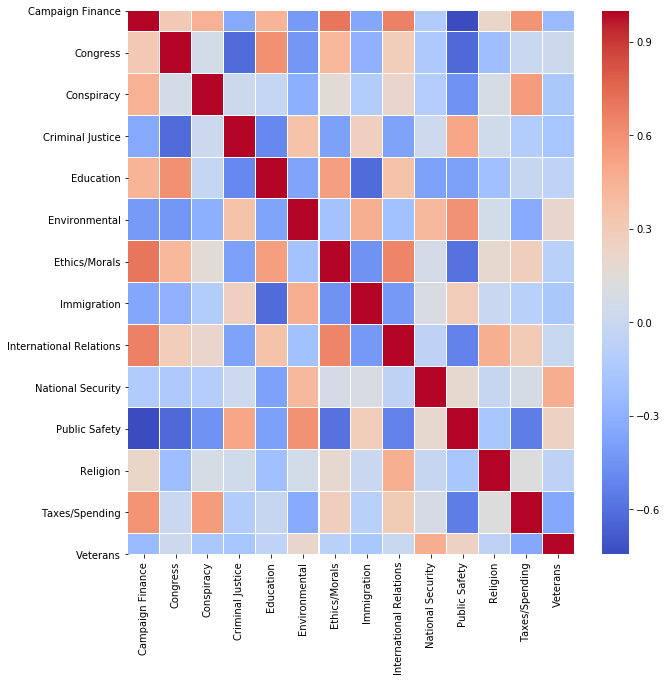

In [105]:
corrmat = Gardner_adj_final_16.drop(['const'], axis = 1).corr()
  
f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1)

In [106]:
# Variance Inflation Factor of significant variables
pd.Series([variance_inflation_factor(Gardner_adj_final_16.values, i) 
               for i in range(Gardner_adj_final_16.shape[1])], 
              index=Gardner_adj_final_16.columns).sort_values()

Conspiracy                     1.837480
Religion                       1.978967
Veterans                       2.204532
Criminal Justice               2.281753
Environmental                  2.896878
Immigration                    3.052337
National Security              3.154719
Taxes/Spending                 3.230654
International Relations        3.273247
Ethics/Morals                  3.812254
Congress                       4.569175
Campaign Finance               5.241702
Education                      5.338293
Public Safety                  7.010598
const                      10408.886337
dtype: float64

In [107]:
Gardner_adj_final_16.describe()

,const,Campaign Finance,Congress,Conspiracy,Criminal Justice,Education,Environmental,Ethics/Morals,Immigration,International Relations,National Security,Public Safety,Religion,Taxes/Spending,Veterans
count,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.0,0.000906,0.037453,0.001740,0.122809,0.037835,0.048902,0.037243,0.016953,0.019837,0.103353,0.120634,0.005259,0.011875,0.011025
std,0.0,0.000092,0.007524,0.000149,0.003647,0.003992,0.003180,0.002973,0.004175,0.001583,0.003829,0.005602,0.000312,0.002084,0.002637
min,1.0,0.000736,0.028085,0.001492,0.113086,0.031589,0.042111,0.029724,0.013241,0.016484,0.094995,0.109581,0.004699,0.008922,0.008624
25%,1.0,0.000829,0.032132,0.001649,0.119855,0.035110,0.046923,0.034976,0.014795,0.018848,0.100830,0.115207,0.005081,0.010344,0.010053
50%,1.0,0.000882,0.036536,0.001710,0.123507,0.038509,0.048170,0.037653,0.015406,0.019811,0.103009,0.120907,0.005212,0.011111,0.010476
75%,1.0,0.000994,0.039247,0.001791,0.125052,0.039697,0.050661,0.039209,0.017099,0.020478,0.105010,0.125367,0.005363,0.013379,0.010957
max,1.0,0.001079,0.067529,0.002487,0.131942,0.054197,0.057136,0.043408,0.035865,0.024457,0.114089,0.130488,0.006528,0.019282,0.025746


# ===================================

# ===================================

# Candidate Term Attribution Models
#### Models using only the terms that the candidates have used

In [108]:
#Read in attribution file
attribution = pd.read_excel(r'C:\Users\boai-\Desktop\UnumAI\Colorado analysis\2020 CO Attribution.xlsx')
attribution.head()

,Unnamed: 0,Cory Gardner,John Hickenlooper,Other Dems
0,farmers market,0,0,1
1,colorado land,1,0,0
2,land,20,5,9
3,lands,28,8,24
4,lands day,1,0,1


In [109]:
attribution['Term'] = attribution['Unnamed: 0']

In [110]:
#join with original data
att_data = data.merge(attribution, on = 'Term', how = 'inner')
att_data = att_data.fillna(0)
att_data.shape
#att_data.head()

(7799, 250)

In [111]:
att_data.head()

,Unnamed: 0_x,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,Unnamed: 0_y,Cory Gardner,John Hickenlooper,Other Dems
0,0,% of people,Electability,0.000000,0.000016,0.000000,0.000000,0.000010,0.000000,0.000000,...,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,% of people,0,1,0
1,1,1 diabetes,Healthcare,0.000014,0.000016,0.000019,0.000000,0.000000,0.000000,0.000011,...,0.000011,0.000021,0.000015,0.000018,0.000012,0.000010,1 diabetes,0,0,1
2,2,1 president,Electability,0.000031,0.000035,0.000075,0.000071,0.000041,0.000077,0.000029,...,0.000047,0.000055,0.000030,0.000040,0.000041,0.000028,1 president,0,0,1
3,3,10 women,Social Equality,0.000010,0.000000,0.000019,0.000012,0.000000,0.000011,0.000011,...,0.000011,0.000021,0.000000,0.000000,0.000012,0.000018,10 women,0,0,1
4,4,100 homes,Economy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100 homes,0,0,1


In [112]:
Hickenlooper_att = att_data[att_data['John Hickenlooper'] > 0]
Hickenlooper_att = Hickenlooper_att.drop(['Unnamed: 0_x','Unnamed: 0_y','Cory Gardner','Other Dems'],axis = 1)

In [113]:
Hickenlooper_att.head()

,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,...,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,John Hickenlooper
0,% of people,Electability,0.000000,0.000016,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,...,0.000000,0.000011,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,1
9,12 people,Public Safety,0.000007,0.000000,0.000034,0.000009,0.000007,0.000000,0.000008,0.000000,...,0.000009,0.000000,0.000008,0.000000,0.000000,0.000033,0.000000,0.000000,0.000007,2
23,2020 dem,Electability,0.000000,0.000000,0.000000,0.000000,0.000018,0.000011,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000009,1
24,2020 democrats,Electability,0.000019,0.000035,0.000051,0.000034,0.000078,0.000081,0.000034,0.000024,...,0.000018,0.000020,0.000018,0.000041,0.000029,0.000027,0.000000,0.000011,0.000012,1
25,2020 election,Electability,0.000035,0.000015,0.000030,0.000015,0.000060,0.000036,0.000026,0.000024,...,0.000044,0.000049,0.000028,0.000047,0.000059,0.000060,0.000035,0.000050,0.000043,2


In [114]:
H_group = Hickenlooper_att[['Category', 'Term']].groupby('Category').count()
H_group.head()

,Term
Category,
Agriculture,24
Campaign Finance,19
Congress,70
Conspiracy,10
Corporate Regulation,20


In [115]:
H_group.shape

(33, 1)

In [116]:
Gardner_att = att_data[att_data['Cory Gardner'] > 0]
Gardner_att = Gardner_att.drop(['Unnamed: 0_x','Unnamed: 0_y','John Hickenlooper','Other Dems'],axis = 1)

In [117]:
Gardner_att.head()

,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,...,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,Cory Gardner
5,100+ northern colorado veterans,Veterans,0.000433,0.000409,0.000438,0.000425,0.000552,0.000539,0.000568,0.000577,...,0.000457,0.000520,0.000418,0.000606,0.000446,0.000563,0.000508,0.000471,0.000600,1
7,115th congress,Congress,0.000008,0.000031,0.000011,0.000010,0.000023,0.000009,0.000000,0.000000,...,0.000009,0.000000,0.000008,0.000000,0.000009,0.000000,0.000000,0.000000,0.000016,1
8,116th congress,Congress,0.000035,0.000000,0.000000,0.000027,0.000014,0.000024,0.000023,0.000020,...,0.000034,0.000024,0.000008,0.000016,0.000009,0.000000,0.000013,0.000027,0.000022,2
13,19th amendment,Social Equality,0.000097,0.000045,0.000059,0.000098,0.000093,0.000101,0.000146,0.000148,...,0.000130,0.000139,0.000145,0.000148,0.000124,0.000070,0.000074,0.000149,0.000139,2
20,2018 farm,Agriculture,0.000000,0.000000,0.000019,0.000000,0.000010,0.000011,0.000000,0.000014,...,0.000000,0.000000,0.000010,0.000000,0.000012,0.000000,0.000000,0.000012,0.000010,1


In [118]:
G_group = Gardner_att[['Category', 'Term']].groupby('Category').count()
G_group.head()

,Term
Category,
Agriculture,27
Campaign Finance,4
Congress,84
Conspiracy,9
Corporate Regulation,15


In [119]:
G_group.shape

(33, 1)

In [120]:
result = pd.merge(H_group, G_group, how='left', on=['Category'])
result.columns = ['John Hicklooper','Cory Gardner']
result.head()

,John Hicklooper,Cory Gardner
Category,,
Agriculture,24,27
Campaign Finance,19,4
Congress,70,84
Conspiracy,10,9
Corporate Regulation,20,15


In [121]:
#result = result.reset_index()
#result = result.rename(columns = { 'index': "Category"})
#result.head()

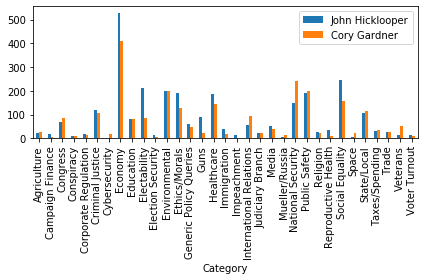

In [122]:
import pandas as pd
import matplotlib.pyplot as plt


#df3=result[['Cory Gardner','John Hicklooper']].set_index('Category')
#print(df3)
result.plot.bar()             # standard bar chart
plt.tight_layout()
plt.show()


In [123]:
reg_df_Gardner = pd.merge(Gardner_att,pca_cats,on='Category',how='left').drop(["Term"],axis = 1).groupby('Component').sum().T


In [124]:
reg_df_Gardner.head()

Component,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,Electability,...,Mueller/Russia,National Security,Public Safety,Religion,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout
2019-02-15 00:00:00,0.001268,0.000085,0.037148,0.000483,0.000919,0.068473,0.000864,0.084897,0.018584,0.035798,...,0.002299,0.101608,0.070360,0.001035,0.001511,0.026968,0.019855,0.002351,0.006899,0.001689
2019-02-16 00:00:00,0.001360,0.000112,0.047371,0.000468,0.000866,0.065866,0.000727,0.074669,0.017217,0.035676,...,0.002619,0.102099,0.077742,0.001293,0.001894,0.025467,0.014493,0.002479,0.006855,0.000993
2019-02-17 00:00:00,0.001421,0.000122,0.038662,0.000468,0.000924,0.071974,0.000877,0.078646,0.017873,0.035791,...,0.002888,0.086007,0.071990,0.001458,0.002137,0.027708,0.012134,0.002153,0.007350,0.000921
2019-02-18 00:00:00,0.001380,0.000096,0.031055,0.000477,0.000979,0.073644,0.000971,0.091351,0.019916,0.036435,...,0.002565,0.076953,0.071883,0.001164,0.001937,0.028788,0.011299,0.002344,0.008467,0.000786
2019-02-19 00:00:00,0.001646,0.000125,0.033196,0.000607,0.000931,0.077375,0.000934,0.094061,0.022344,0.039508,...,0.002526,0.074600,0.066477,0.000942,0.001682,0.027925,0.009954,0.002140,0.007937,0.001052


In [125]:
#reg_df_Gardner = reg_df_Gardner.drop('Unnamed: 0', axis = 0)
reg_df_Gardner = reg_df_Gardner.reset_index().rename(columns={'index':'Date'})
reg_df_Gardner['Date'] = pd.to_datetime(reg_df_Gardner['Date'], infer_datetime_format=True)
reg_df_Gardner = pd.merge(reg_df_Gardner,dependents,on='Date',how='inner')
reg_df_Gardner = reg_df_Gardner.fillna(0)
reg_df_Gardner.head()

ValueError: ('Unknown string format:', 'Cory Gardner')

In [ ]:
reg_df_Gardner = reg_df_Gardner.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)


In [ ]:
reg_df_Gardner.head()

# =======================================

# Gardner - attribution model

In [ ]:
# Removing Electability, Date, and other Candidates
Gardner_att_data = reg_df_Gardner

In [ ]:
Gardner_att_baseline.shape

In [ ]:
Gardner_att.shape

In [ ]:
Gardner_adj.shape

In [ ]:
Gardner_att_baseline = sm.add_constant(Gardner_att_data)
mod = sm.OLS(Gardner_adj, Gardner_att_baseline)
res = mod.fit()
print(res.summary())

In [ ]:
steyer_att_final = sm.add_constant(steyer_att_data.drop([***Drop Columns Here***], axis = 1))
mod = sm.OLS(steyer, steyer_att_final)
res = mod.fit()
res.summary()

In [ ]:
steyer_att_final.corr()

In [ ]:
pd.Series([variance_inflation_factor(steyer_att_final.values, i) 
               for i in range(steyer_att_final.shape[1])], 
              index=steyer_att_final.columns).sort_values()